Columns in the dataset: Index(['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName',
       'State', 'City', 'Metro', 'CountyName', 'BaseDate', '2024-10-31',
       '2024-12-31', '2025-09-30'],
      dtype='object')
   RegionID  SizeRank  RegionName RegionType StateName State      City  \
0     91982         1       77494        zip        TX    TX      Katy   
1     61148         2        8701        zip        NJ    NJ  Lakewood   
2     91940         3       77449        zip        TX    TX      Katy   
3     62080         4       11368        zip        NY    NY  New York   
4     91733         5       77084        zip        TX    TX   Houston   

                                   Metro        CountyName    BaseDate  \
0   Houston-The Woodlands-Sugar Land, TX  Fort Bend County  2024-09-30   
1  New York-Newark-Jersey City, NY-NJ-PA      Ocean County  2024-09-30   
2   Houston-The Woodlands-Sugar Land, TX     Harris County  2024-09-30   
3  New York-Newark-Jersey City, 

C:\Users\Nimith Narapareddy\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
404/404 ━━━━━━━━━━━━━━━━━━━━ 8s 19ms/step - loss: 2.1692 - val_loss: 0.8721
Epoch 2/50
404/404 ━━━━━━━━━━━━━━━━━━━━ 8s 18ms/step - loss: 1.9952 - val_loss: 1.0229
Epoch 3/50
404/404 ━━━━━━━━━━━━━━━━━━━━ 8s 19ms/step - loss: 0.7150 - val_loss: 1.1160
Epoch 4/50
404/404 ━━━━━━━━━━━━━━━━━━━━ 8s 19ms/step - loss: 0.2353 - val_loss: 1.0485
Epoch 5/50
404/404 ━━━━━━━━━━━━━━━━━━━━ 8s 19ms/step - loss: 0.1350 - val_loss: 1.0202
Epoch 6/50
404/404 ━━━━━━━━━━━━━━━━━━━━ 9s 21ms/step - loss: 0.1024 - val_loss: 1.0103
Epoch 7/50
404/404 ━━━━━━━━━━━━━━━━━━━━ 8s 20ms/step - loss: 0.0908 - val_loss: 0.9807
Epoch 8/50
404/404 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - loss: 0.0876 - val_loss: 0.9690
Epoch 9/50
404/404 ━━━━━━━━━━━━━━━━━━━━ 8s 19ms/step - loss: 0.0934 - val_loss: 0.9900
Epoch 10/50
404/404 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - loss: 0.0952 - val_loss: 0.9487
Epoch 11/50
404/404 ━━━━━━━━━━━━━━━━━━━━ 8s 19ms/step - loss: 0.0912 - val_loss: 0.9467
Epoch 12/50
404/404 ━━━━━━━━━━━━━━━━━━━━ 

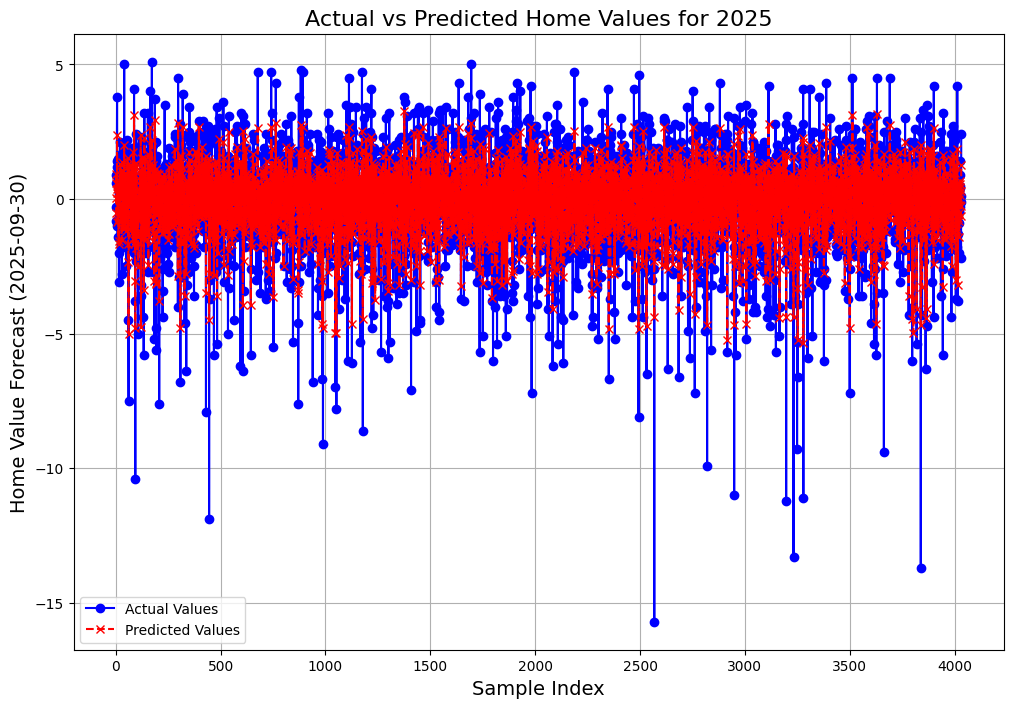

Mean Squared Error: 0.7610692560211834


In [6]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load your dataset
data = pd.read_csv(r'C:\Users\Nimith Narapareddy\Documents\Python Scripts\Zip_zhvf_growth_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv')

# Inspect the data
print("Columns in the dataset:", data.columns)
print(data.head())

# Selecting features and target (using the '2025-09-30' for prediction)
features = ['RegionName', 'State', 'City', 'Metro', 'CountyName']  # Removed 'BaseDate' because it's non-numeric
target = '2025-09-30'

# Splitting into X (features) and y (target)
X = data[features]
y = data[target]

# Preprocessing for categorical data
categorical_features = ['RegionName', 'State', 'City', 'Metro', 'CountyName']
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)  # Handling unknown categories
    ]
)

# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating a pipeline with preprocessing (OneHotEncoding) and scaling
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('scaler', StandardScaler(with_mean=False))  # with_mean=False to handle sparse data from OneHotEncoder
])

# Fit and transform the training data
X_train = pipeline.fit_transform(X_train)
X_test = pipeline.transform(X_test)

# Define the TensorFlow model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Evaluate the model
loss = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")

# Predict on the test set
y_pred = model.predict(X_test)

# Enhanced visualization
plt.figure(figsize=(12, 8))
plt.plot(y_test.values, label='Actual Values', color='blue', marker='o')
plt.plot(y_pred, label='Predicted Values', color='red', linestyle='--', marker='x')
plt.title('Actual vs Predicted Home Values for 2025', fontsize=16)
plt.xlabel('Sample Index', fontsize=14)
plt.ylabel('Home Value Forecast (2025-09-30)', fontsize=14)
plt.legend()
plt.grid(True)
plt.show()

# Calculate mean squared error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")


Mean Squared Error: 0.4370719067691545


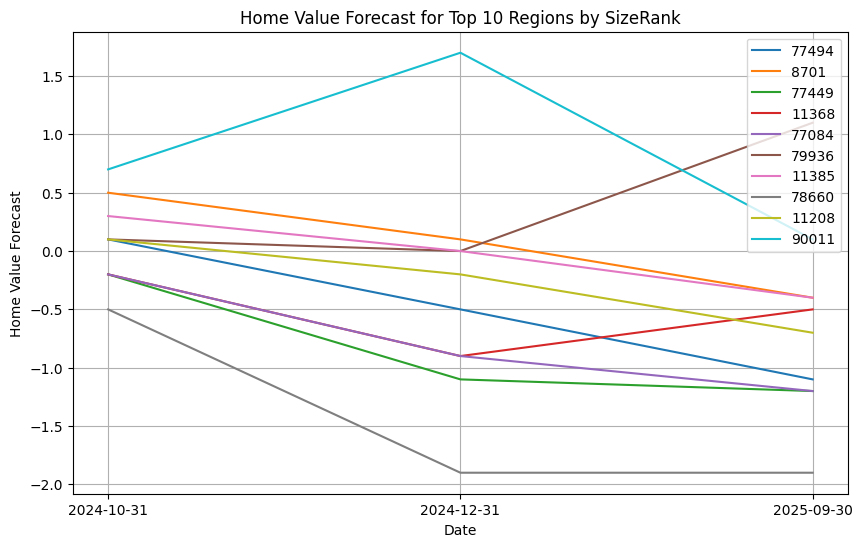

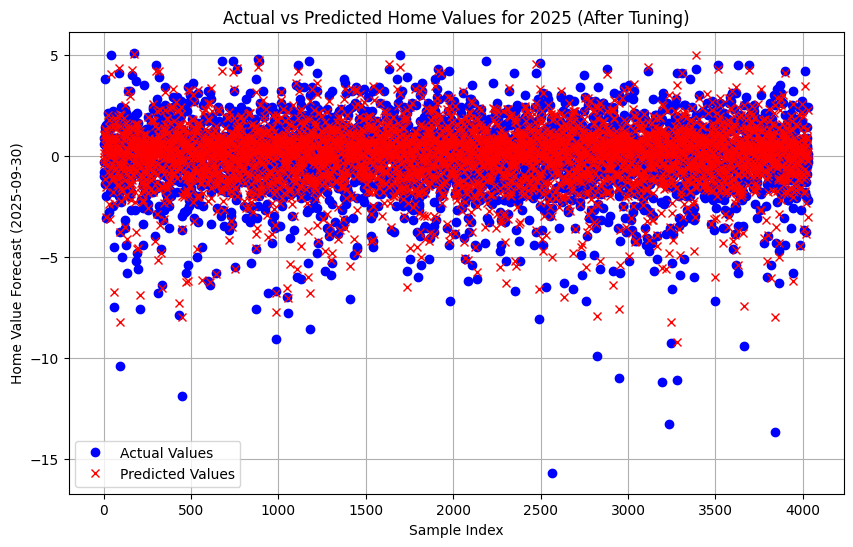

In [9]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

# Update this path with the actual path to your CSV file
data_path = "C:/Users/Nimith Narapareddy/Documents/Python Scripts/Zip_zhvf_growth_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv"

# Load the dataset
data = pd.read_csv(data_path)

# Keep necessary columns
columns_needed = ['RegionID', 'SizeRank', 'RegionName', 'State', 'Metro', '2024-10-31', '2024-12-31', '2025-09-30']
data = data[columns_needed]

# Preprocessing for categorical and numerical data
categorical_features = ['RegionName', 'State', 'Metro']
numerical_features = ['SizeRank', '2024-10-31', '2024-12-31']

# X (features) and y (target)
X = data[categorical_features + numerical_features]
y = data['2025-09-30']

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# Model pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor(n_estimators=100, random_state=42))
])

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the model
pipeline.fit(X_train, y_train)

# Predictions
y_pred = pipeline.predict(X_test)

# Evaluate model performance
mse = np.mean((y_test - y_pred)**2)

# Print the Mean Squared Error (MSE)
print(f"Mean Squared Error: {mse}")

# Create a DataFrame to compare actual and predicted
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# Get top 10 regions by SizeRank
top_10_data = data.sort_values(by='SizeRank').head(10)

# Create a visualization for the top 10 regions
plt.figure(figsize=(10, 6))
for index, row in top_10_data.iterrows():
    plt.plot(['2024-10-31', '2024-12-31', '2025-09-30'], 
             row[['2024-10-31', '2024-12-31', '2025-09-30']], 
             label=row['RegionName'])

plt.xlabel('Date')
plt.ylabel('Home Value Forecast')
plt.title('Home Value Forecast for Top 10 Regions by SizeRank')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

# Visualize the predictions vs actuals
plt.figure(figsize=(10, 6))
plt.plot(range(len(y_test)), y_test, 'bo', label="Actual Values")
plt.plot(range(len(y_pred)), y_pred, 'rx', label="Predicted Values")
plt.xlabel('Sample Index')
plt.ylabel('Home Value Forecast (2025-09-30)')
plt.title('Actual vs Predicted Home Values for 2025 (After Tuning)')
plt.legend()
plt.grid(True)
plt.show()


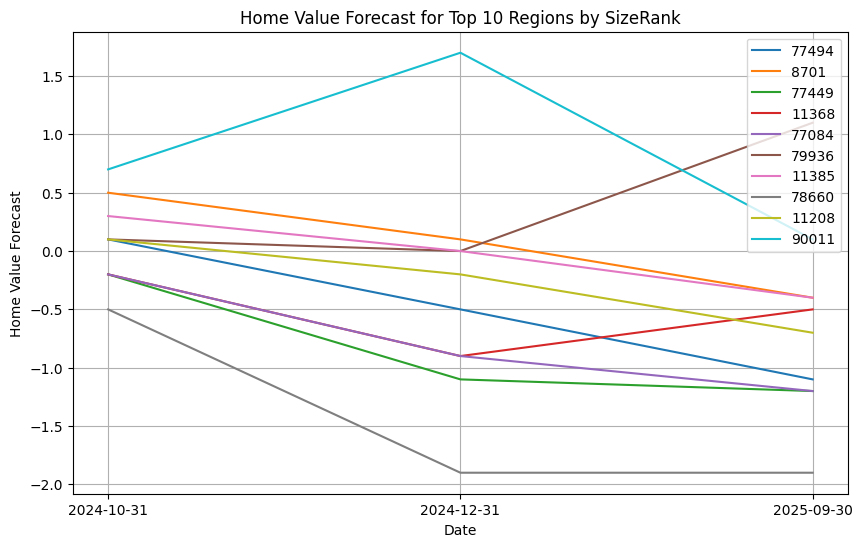

In [10]:
import matplotlib.pyplot as plt

# Get top 10 regions by SizeRank
top_10_data = data.sort_values(by='SizeRank').head(10)

# Create a visualization for the top 10 regions using RegionName for labeling
plt.figure(figsize=(10, 6))
for index, row in top_10_data.iterrows():
    plt.plot(['2024-10-31', '2024-12-31', '2025-09-30'], 
             row[['2024-10-31', '2024-12-31', '2025-09-30']], 
             label=row['RegionName'])  # Use 'RegionName' for the label

plt.xlabel('Date')
plt.ylabel('Home Value Forecast')
plt.title('Home Value Forecast for Top 10 Regions by SizeRank')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()


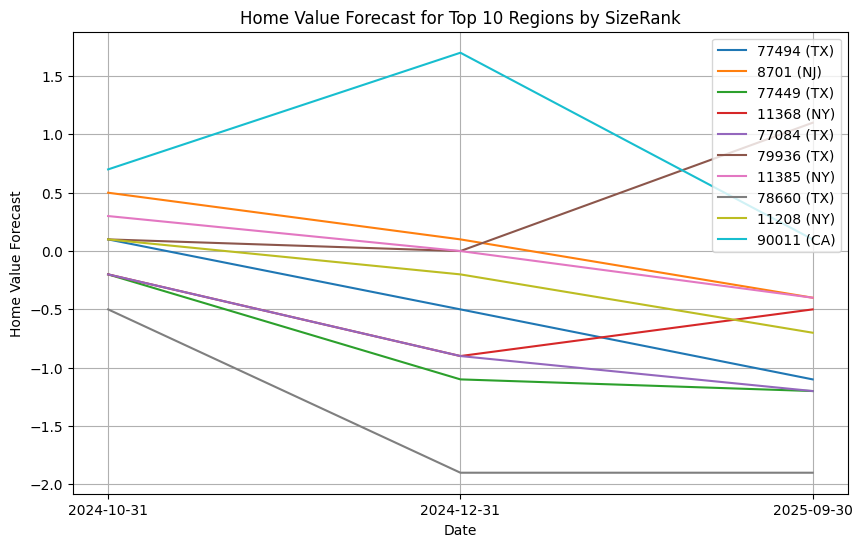

In [11]:
import matplotlib.pyplot as plt

# Sort the data and get the top 10 regions by SizeRank
top_10_data = data.sort_values(by='SizeRank').head(10)

# Create a plot for the top 10 regions using RegionName for labeling
plt.figure(figsize=(10, 6))
for index, row in top_10_data.iterrows():
    plt.plot(['2024-10-31', '2024-12-31', '2025-09-30'], 
             row[['2024-10-31', '2024-12-31', '2025-09-30']], 
             label=f"{row['RegionName']} ({row['State']})")  # Label by 'RegionName' and 'State'

plt.xlabel('Date')
plt.ylabel('Home Value Forecast')
plt.title('Home Value Forecast for Top 10 Regions by SizeRank')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()


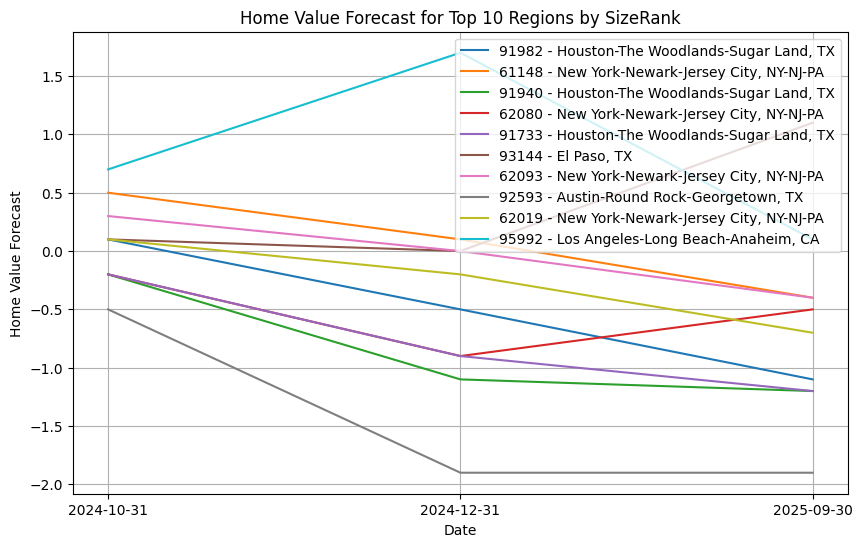

In [12]:
import matplotlib.pyplot as plt

# Sort the data and get the top 10 regions by SizeRank
top_10_data = data.sort_values(by='SizeRank').head(10)

# Create a plot for the top 10 regions using RegionID and RegionName for labeling
plt.figure(figsize=(10, 6))
for index, row in top_10_data.iterrows():
    region_label = f"{row['RegionID']} - {row['Metro']}"  # Use 'RegionID' and 'Metro' (or 'RegionName')
    plt.plot(['2024-10-31', '2024-12-31', '2025-09-30'], 
             row[['2024-10-31', '2024-12-31', '2025-09-30']], 
             label=region_label)  # Label by 'RegionID' and 'Metro' or 'RegionName'

plt.xlabel('Date')
plt.ylabel('Home Value Forecast')
plt.title('Home Value Forecast for Top 10 Regions by SizeRank')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()


MovieWriter imagemagick unavailable; using Pillow instead.


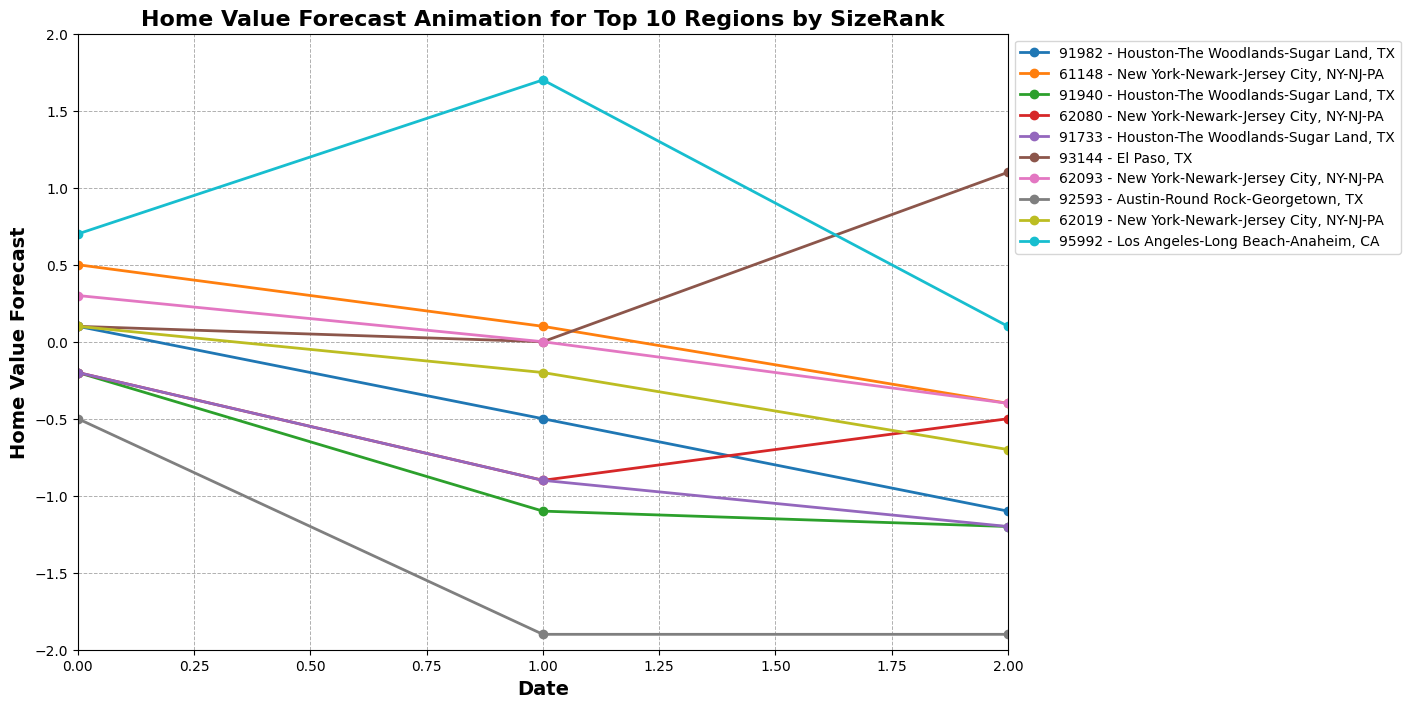

In [13]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Sort the data and get the top 10 regions by SizeRank
top_10_data = data.sort_values(by='SizeRank').head(10)

# Prepare the data for animation
dates = ['2024-10-31', '2024-12-31', '2025-09-30']
fig, ax = plt.subplots(figsize=(12, 8))

# Initialize the plot
lines = []
for index, row in top_10_data.iterrows():
    region_label = f"{row['RegionID']} - {row['Metro']}"
    line, = ax.plot([], [], label=region_label, marker='o', linewidth=2)  # Empty plot
    lines.append(line)

# Set the axes labels and title
ax.set_xlabel('Date', fontsize=14, fontweight='bold')
ax.set_ylabel('Home Value Forecast', fontsize=14, fontweight='bold')
ax.set_title('Home Value Forecast Animation for Top 10 Regions by SizeRank', fontsize=16, fontweight='bold')

# Add a legend outside the plot
ax.legend(loc='upper left', fontsize=10, bbox_to_anchor=(1, 1))

# Set the limits for x and y axes
ax.set_xlim(0, len(dates) - 1)
ax.set_ylim(-2, 2)  # Adjust based on your data range

# Add grid lines
ax.grid(True, linestyle='--', linewidth=0.7)

# Function to update the plot for each frame
def update(num):
    for line, (_, row) in zip(lines, top_10_data.iterrows()):
        line.set_data(range(num + 1), row[dates[:num + 1]])  # Update the data for each line
    
    return lines

# Create the animation
ani = animation.FuncAnimation(fig, update, frames=len(dates), interval=1000, blit=True)

# Save the animation (optional) or display
ani.save('home_value_forecast_animation.gif', writer='imagemagick')  # Save as a gif
# plt.show()  # If you just want to display the animation in a Jupyter notebook or interactive environment


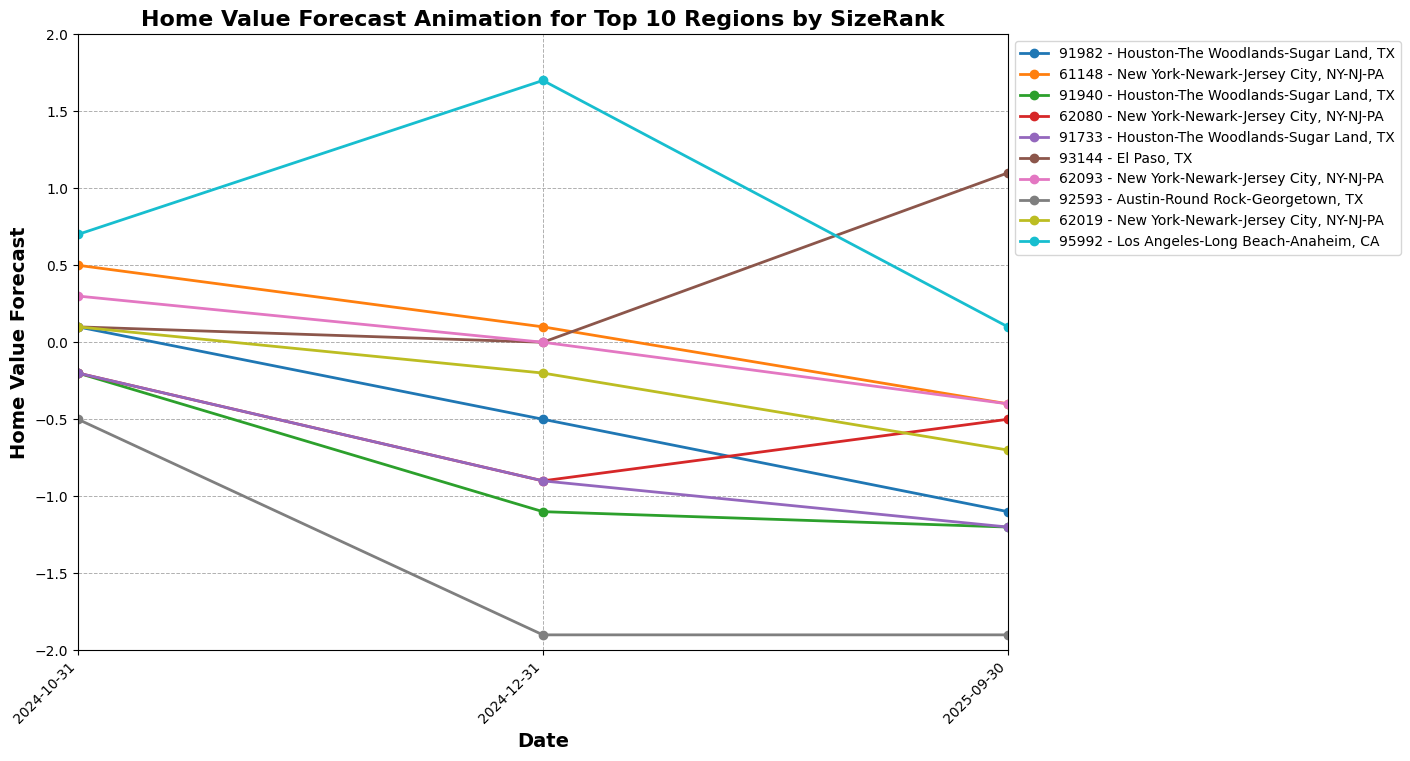

In [14]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Sort the data and get the top 10 regions by SizeRank
top_10_data = data.sort_values(by='SizeRank').head(10)

# Prepare the data for animation
dates = ['2024-10-31', '2024-12-31', '2025-09-30']
fig, ax = plt.subplots(figsize=(12, 8))

# Initialize the plot
lines = []
for index, row in top_10_data.iterrows():
    region_label = f"{row['RegionID']} - {row['Metro']}"
    line, = ax.plot([], [], label=region_label, marker='o', linewidth=2)  # Empty plot
    lines.append(line)

# Set the axes labels and title
ax.set_xlabel('Date', fontsize=14, fontweight='bold')
ax.set_ylabel('Home Value Forecast', fontsize=14, fontweight='bold')
ax.set_title('Home Value Forecast Animation for Top 10 Regions by SizeRank', fontsize=16, fontweight='bold')

# Set the x-axis ticks to the actual date values
ax.set_xticks(range(len(dates)))
ax.set_xticklabels(dates, rotation=45, ha="right")

# Add a legend outside the plot
ax.legend(loc='upper left', fontsize=10, bbox_to_anchor=(1, 1))

# Set the limits for x and y axes
ax.set_xlim(0, len(dates) - 1)
ax.set_ylim(-2, 2)  # Adjust based on your data range

# Add grid lines
ax.grid(True, linestyle='--', linewidth=0.7)

# Function to update the plot for each frame
def update(num):
    for line, (_, row) in zip(lines, top_10_data.iterrows()):
        line.set_data(range(num + 1), row[dates[:num + 1]])  # Update the data for each line
    
    return lines

# Create the animation
ani = animation.FuncAnimation(fig, update, frames=len(dates), interval=1000, blit=True)

# Save the animation using Pillow since imagemagick is unavailable
ani.save('home_value_forecast_animation.gif', writer='pillow')  # Save as a gif
# plt.show()  # If you just want to display the animation in a Jupyter notebook or interactive environment
